In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
series = pd.read_excel("D:\\DATA_science\\DATA_science assignment\\Forecasting\\Airlines+Data.xlsx", header = 0, index_col = 0,
                     parse_dates = True)

In [3]:
series.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [4]:
series.shape

(96, 1)

In [5]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [6]:
series.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


## Visulizations of Airlines dataset

### Line Plot

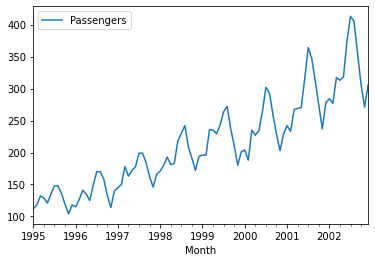

In [7]:
series.plot()
plt.show()         ## It is looking that, it has upward linear trend with multiplicative seasonality

<AxesSubplot:xlabel='Month'>

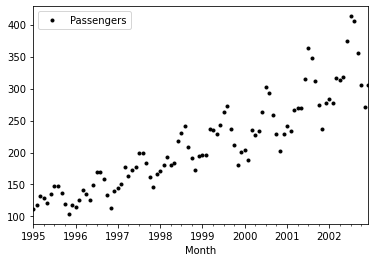

In [8]:
series.plot(style='k.')

### Histogram and Density plot

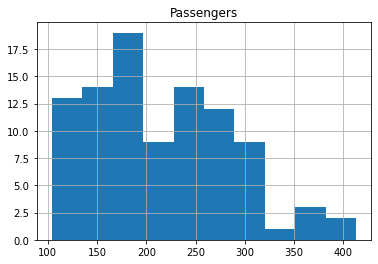

In [9]:
series.hist()
plt.show()

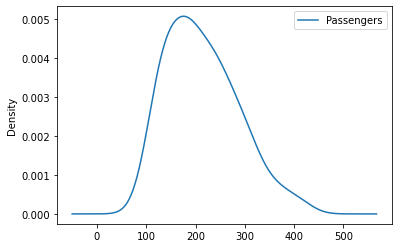

In [10]:
series.plot(kind = 'kde')
plt.show()

### Box and Whisker plot

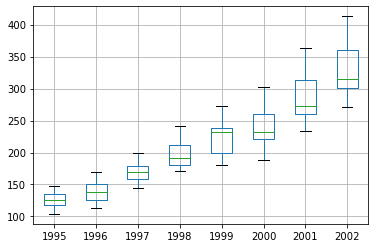

In [12]:
series = pd.read_excel("D:\\DATA_science\\DATA_science assignment\\Forecasting\\Airlines+Data.xlsx", header = 0, index_col = 0,
                     parse_dates = True, squeeze = True)
from pandas import Grouper
groups = series.groupby(Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
plt.show()

### Lag plot

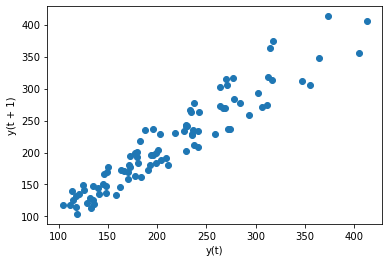

In [13]:
pd.plotting.lag_plot(series)
plt.show()                       ## looks like there is a positive relationship with its lag.

### Autocorrelation plot

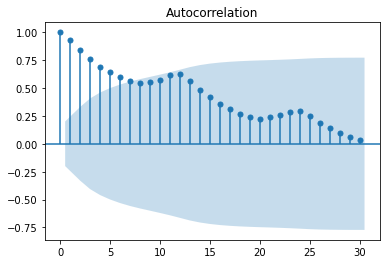

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series,lags=30)
plt.show()

### Heat map for year 1995

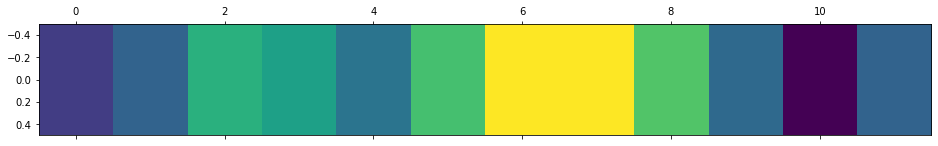

In [15]:
one_year = series['1995']
groups = one_year.groupby(Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
plt.matshow(months, interpolation=None, aspect='auto')
plt.show()